# SINGLE TRACKING - TOTEM & MULTI - RP 20 - RP 22 

# IMPORTS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import LogNorm
import datetime

# DATA 

### FILE NAMES

In [2]:
FILE_BASE = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/'

# PRECOOKED RPS
TOP_20 = 'TOP_20/'
HOR_22 = 'HOR_22/'

# PRECOOKED HITS
MY_HITS = 'my_hits/'
TOTEM_HITS = 'totem_hits/'

# PRECOOKED DATA FILE TEMPLATES
MY_DATA_FILE_20 = '{}-{}_pc_my_hits_20_df.csv'
MY_DATA_FILE_22 = '{}-{}_pc_my_hits_22_df.csv'
TOTEM_DATA_FILE_20 = '{}-{}_pc_totem_hits_20_df.csv'
TOTEM_DATA_FILE_22 = '{}-{}_pc_totem_hits_22_df.csv'

# CSV_TEMPLATES
MY_TOP_20_CSV    = FILE_BASE + TOP_20 + MY_HITS + MY_DATA_FILE_20
MY_HOR_22_CSV    = FILE_BASE + HOR_22 + MY_HITS + MY_DATA_FILE_22
TOTEM_TOP_20_CSV = FILE_BASE + TOP_20 + TOTEM_HITS + TOTEM_DATA_FILE_20
TOTEM_HOR_22_CSV = FILE_BASE + HOR_22 + TOTEM_HITS + TOTEM_DATA_FILE_22

print(MY_TOP_20_CSV)
print(TOTEM_TOP_20_CSV)
print(MY_HOR_22_CSV)
print(TOTEM_HOR_22_CSV)

/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/TOP_20/my_hits/{}-{}_pc_my_hits_20_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/TOP_20/totem_hits/{}-{}_pc_totem_hits_20_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/HOR_22/my_hits/{}-{}_pc_my_hits_22_df.csv
/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/pre_cook_data/HOR_22/totem_hits/{}-{}_pc_totem_hits_22_df.csv


In [3]:
# TESTING
# print(MY_TOP_20_CSV.format(0,49))
# print(TOTEM_TOP_20_CSV.format(0,49))
# print(MY_HOR_22_CSV.format(0,49))
# print(TOTEM_HOR_22_CSV.format(0,49))

### DATAFRAMES CACHE 

In [4]:
# DATAFRAME NAMES
DF_NAME_MY_TOP_20 = 'DF_NAME_MY_TOP_20'
DF_NAME_MY_HOR_22 = 'DF_NAME_MY_HOR_22'
DF_NAME_TOTEM_TOP_20 = 'DF_NAME_TOTEM_TOP_20'
DF_NAME_TOTEM_HOR_22 = 'DF_NAME_TOTEM_HOR_22'

DF_CACHE = {
    DF_NAME_MY_TOP_20 : None,    
    DF_NAME_MY_HOR_22 : None,    
    DF_NAME_TOTEM_TOP_20 : None,    
    DF_NAME_TOTEM_HOR_22 : None  
}

### DATAFRAMES TRANSLATIONS 

In [5]:
DF_NAME_TO_CSV_TEMPLATE = {
    DF_NAME_MY_TOP_20 : MY_TOP_20_CSV,     
    DF_NAME_MY_HOR_22 : MY_HOR_22_CSV,     
    DF_NAME_TOTEM_TOP_20 : TOTEM_TOP_20_CSV,     
    DF_NAME_TOTEM_HOR_22 : TOTEM_HOR_22_CSV    
}

DF_NAME_TO_XY_COLS = {
    DF_NAME_MY_TOP_20 : ['single_x', 'single_y'],
    DF_NAME_MY_HOR_22 : ['single_x', 'single_y'],
    DF_NAME_TOTEM_TOP_20 : ['totem_x', 'totem_y'],
    DF_NAME_TOTEM_HOR_22 : ['totem_x', 'totem_y']
}

DF_NAME_TO_TITLE = {
    DF_NAME_MY_TOP_20 : 'Track hits in RP 20 (vertical).\nReconstructed with new multitracking algorithm.',     
    DF_NAME_MY_HOR_22 : 'Track hits in RP 22 (horizontal).\nReconstructed with new multitracking algorithm.',     
    DF_NAME_TOTEM_TOP_20 : 'Track hits in RP 20 (vertical).\nReconstructed with TOTEM UV projections.',     
    DF_NAME_TOTEM_HOR_22 : 'Track hits in RP 22 (horizontal).\nReconstructed with TOTEM UV projections.'    
}

DF_NAME_TO_PNG_FILE = {
    DF_NAME_MY_TOP_20 : 'MY_HOR_22.png',     
    DF_NAME_MY_HOR_22 : 'MY_TOP_20.png',     
    DF_NAME_TOTEM_TOP_20 : 'TOTEM_HOR_22.png',     
    DF_NAME_TOTEM_HOR_22 : 'TOTEM_TOP_20.png'     
}


# CONFIG 

In [6]:
RECO_STARTS = range(0, 1600, 50)
RECO_ENDS = [reco_start + 49 for reco_start in RECO_STARTS]
print(RECO_STARTS)
print(RECO_ENDS)

DF_NAMES_TO_LOAD = [
    DF_NAME_MY_TOP_20,    
    DF_NAME_MY_HOR_22,    
    DF_NAME_TOTEM_TOP_20,    
    DF_NAME_TOTEM_HOR_22  
] 

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550]
[49, 99, 149, 199, 249, 299, 349, 399, 449, 499, 549, 599, 649, 699, 749, 799, 849, 899, 949, 999, 1049, 1099, 1149, 1199, 1249, 1299, 1349, 1399, 1449, 1499, 1549, 1599]


# DATAFRAMES 

In [7]:
# my_top_20_df = None
# my_hor_22_df = None
# totem_top_20_df = None
# totem_hor_22_df = None

# for idx in [0, 1]:#range(len(RECO_STARTS)):
#     reco_start = RECO_STARTS[idx]
#     reco_end = RECO_ENDS[idx]
    
#     print(MY_TOP_20_CSV.format(reco_start, reco_end))
#     print(TOTEM_TOP_20_CSV.format(reco_start, reco_end))
#     print(MY_HOR_22_CSV.format(reco_start, reco_end))
#     print(TOTEM_HOR_22_CSV.format(reco_start, reco_end))
    
#     # CREATE NEW DF
#     new_my_20_df = pd.read_csv(MY_TOP_20_CSV.format(reco_start, reco_end))
#     new_my_22_df = pd.read_csv(MY_HOR_22_CSV.format(reco_start, reco_end))
#     new_totem_20_df = pd.read_csv(TOTEM_TOP_20_CSV.format(reco_start, reco_end))
#     new_totem_22_df = pd.read_csv(TOTEM_HOR_22_CSV.format(reco_start, reco_end))
    
#     # UPDATE
#     my_top_20_df = pd.concat([my_top_20_df, new_my_20_df])
#     my_hor_22_df = pd.concat([my_hor_22_df, new_my_22_df])
#     totem_top_20_df = pd.concat([totem_top_20_df, new_totem_20_df])
#     totem_hor_22_df = pd.concat([totem_hor_22_df, new_totem_22_df])
    

### LOAD DATAFRAMES 

In [8]:
def get_combined_df_from_partial(df_name):
    print("Combining df: {}".format(df_name))
    
    combined_df = None
    
    for idx in range(len(RECO_STARTS)):
        reco_start = RECO_STARTS[idx]
        reco_end = RECO_ENDS[idx]
        print("\tAppend from: {}-{}".format(reco_start, reco_end))
        print("\t{}".format(datetime.datetime.now().time()))
        
        new_csv = DF_NAME_TO_CSV_TEMPLATE[df_name].format(reco_start, reco_end)
        new_df = pd.read_csv(new_csv)
        combined_df = pd.concat([combined_df, new_df])

    return combined_df

In [9]:
def load_dfs():
    for df_name in DF_NAMES_TO_LOAD:
        DF_CACHE[df_name] = get_combined_df_from_partial(df_name)

In [10]:
# load_dfs()
DF_CACHE

{'DF_NAME_MY_HOR_22': None,
 'DF_NAME_MY_TOP_20': None,
 'DF_NAME_TOTEM_HOR_22': None,
 'DF_NAME_TOTEM_TOP_20': None}

## PLOTTING 

### 1. HELPER - CUTTING 

In [11]:
DF_NAME_TO_XY_CONSTRAINTS = {
    DF_NAME_MY_TOP_20 : [-25.0, 25.0, 0.0, 50.0], # X_MIN, X_MAX, Y_MIN, Y_MAX
    DF_NAME_MY_HOR_22 : [0.0, 50.0, -25.0, 25.0],
    DF_NAME_TOTEM_TOP_20 : [-25.0, 25.0, 0.0, 50.0],
    DF_NAME_TOTEM_HOR_22 : [0.0, 50.0, -25.0, 25.0]
}

In [12]:
# X_MIN = -20.0
# X_MAX = 20.0
# Y_MIN = 0.0
# Y_MAX = 40.0

def get_percent(a, b):
    return float(a) / b * 100

def get_cut_df(df, df_name, x_column=None, y_column=None, cut_out_det_tracks=False, dist_avg_cut=None, track_type=None):
    print("Cutting hits")
    
    df_len = len(df)
    original_length = len(df)

    X_MIN, X_MAX, Y_MIN, Y_MAX = DF_NAME_TO_XY_CONSTRAINTS[df_name]
    
    # CUT TRACKS OUT OF FRAME
    print("\tDf len: {}".format(df_len))
    cut_df = df.loc[(df[x_column] > X_MIN) & 
                    (df[x_column] < X_MAX) &
                    (df[y_column] > Y_MIN) & 
                    (df[y_column] < Y_MAX)]
    
    cut_len_1 = len(cut_df)
    cut_df_diff = df_len - cut_len_1
    print("\tCut to fit frame: {}, Percent: {}".format(cut_df_diff, get_percent(cut_df_diff, df_len)))
    
    return cut_df

### MAIN 

In [13]:
hits_png_base = '/eos/user/p/plawski/SWAN_projects/RzymskiKociolek/Histograms/analysis_multi_single/code/single/plots/'

def plot_heatmap(df, df_name, x_column=None, y_column=None):
    figure(figsize=(12, 9), dpi=100)

    cut_df = get_cut_df(df, df_name, x_column=x_column, y_column=y_column)

    plot_title = DF_NAME_TO_TITLE[df_name]
    x = np.array(cut_df[x_column])
    y = np.array(cut_df[y_column])
 
    plt.rcParams['font.size'] = 15
    plt.title(plot_title)
    plt.xlabel('x [mm]', fontsize=15)
    plt.ylabel('y [mm]', fontsize=15)

    plot_title = DF_NAME_TO_TITLE[df_name]
    plt.title(plot_title)

    plt.hist2d(x, y, bins = (800, 800), cmap=plt.cm.jet, norm=LogNorm())
    plt.colorbar()

    # Create filename
    hits_png_filename = hits_png_base + DF_NAME_TO_PNG_FILE[df_name]
    plt.savefig(hits_png_filename)    
    
    plt.show()

In [14]:
DF_CACHE

{'DF_NAME_MY_HOR_22': None,
 'DF_NAME_MY_TOP_20': None,
 'DF_NAME_TOTEM_HOR_22': None,
 'DF_NAME_TOTEM_TOP_20': None}

In [15]:
def plot_all():
    for df_name in DF_NAMES_TO_LOAD:
        
#         df = DF_CACHE[df_name]
        df = get_combined_df_from_partial(df_name)
        print("\tPlot {} - {}".format(df_name, datetime.datetime.now().time()))
        x_column, y_column = DF_NAME_TO_XY_COLS[df_name]
        
        plot_heatmap(df, df_name, x_column=x_column, y_column=y_column)

In [16]:
# DF_NAME_TO_TITLE = {
#     DF_NAME_MY_TOP_20 : 'Track hits in RP 20 (vertical). Reconstructed with new algorithm.',     
#     DF_NAME_MY_HOR_22 : 'Track hits in RP 22 (horizontal). Reconstructed with new algorithm.',     
#     DF_NAME_TOTEM_TOP_20 : 'Track hits in RP 20 (vertical). Reconstructed TOTEM UV projections.',     
#     DF_NAME_TOTEM_HOR_22 : 'Track hits in RP 22 (horizontal). Reconstructed TOTEM UV projections.'    
# }

Combining df: DF_NAME_MY_TOP_20
	Append from: 0-49
	22:35:45.647704
	Append from: 50-99
	22:35:52.138567
	Append from: 100-149
	22:35:57.441291
	Append from: 150-199
	22:36:03.249836
	Append from: 200-249
	22:36:09.053164
	Append from: 250-299
	22:36:25.122132
	Append from: 300-349
	22:36:31.589267
	Append from: 350-399
	22:36:38.208545
	Append from: 400-449
	22:36:50.647002
	Append from: 450-499
	22:36:57.425603
	Append from: 500-549
	22:37:04.310686
	Append from: 550-599
	22:37:20.912874
	Append from: 600-649
	22:37:27.891528
	Append from: 650-699
	22:37:34.746221
	Append from: 700-749
	22:37:41.420033
	Append from: 750-799
	22:37:48.259707
	Append from: 800-849
	22:37:55.029545
	Append from: 850-899
	22:38:01.802956
	Append from: 900-949
	22:38:08.635403
	Append from: 950-999
	22:38:14.877806
	Append from: 1000-1049
	22:38:21.050918
	Append from: 1050-1099
	22:38:27.465728
	Append from: 1100-1149
	22:38:34.187097
	Append from: 1150-1199
	22:38:40.064470
	Append from: 1200-1249
	22:3

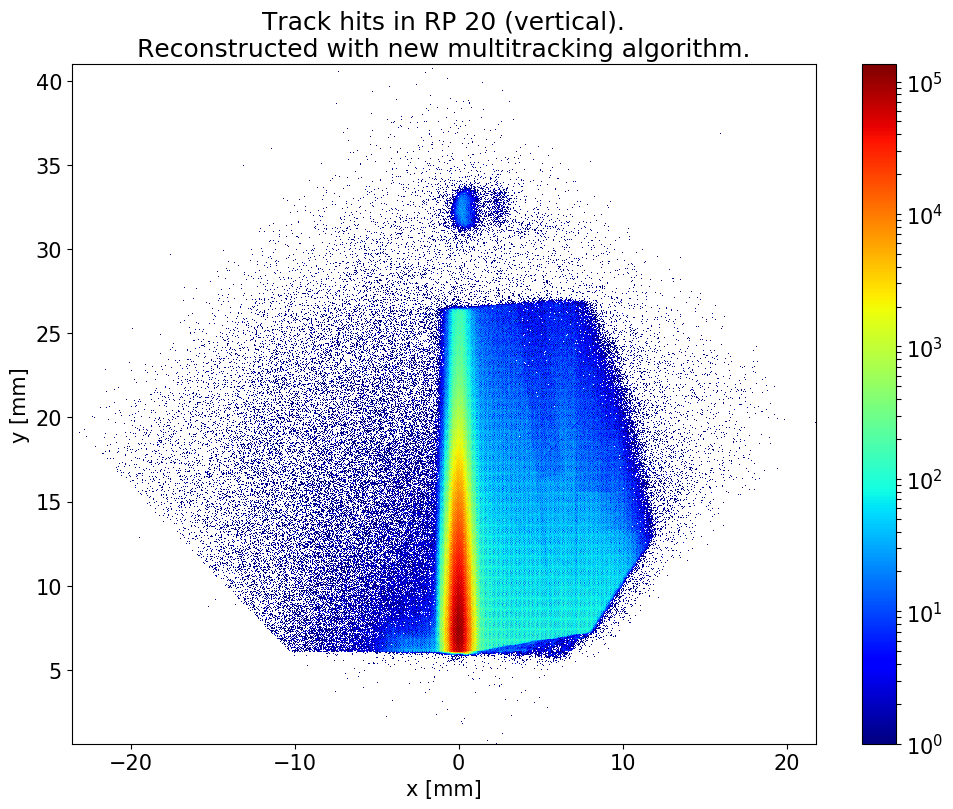

Combining df: DF_NAME_MY_HOR_22
	Append from: 0-49
	22:40:13.658977
	Append from: 50-99
	22:40:13.823642
	Append from: 100-149
	22:40:13.919695
	Append from: 150-199
	22:40:14.012938
	Append from: 200-249
	22:40:14.111151
	Append from: 250-299
	22:40:14.211499
	Append from: 300-349
	22:40:14.288925
	Append from: 350-399
	22:40:14.377091
	Append from: 400-449
	22:40:14.461997
	Append from: 450-499
	22:40:14.544115
	Append from: 500-549
	22:40:14.627537
	Append from: 550-599
	22:40:14.727490
	Append from: 600-649
	22:40:14.810942
	Append from: 650-699
	22:40:14.901511
	Append from: 700-749
	22:40:15.034363
	Append from: 750-799
	22:40:15.136131
	Append from: 800-849
	22:40:15.222118
	Append from: 850-899
	22:40:15.621326
	Append from: 900-949
	22:40:15.739199
	Append from: 950-999
	22:40:15.868897
	Append from: 1000-1049
	22:40:15.965315
	Append from: 1050-1099
	22:40:16.061021
	Append from: 1100-1149
	22:40:16.172581
	Append from: 1150-1199
	22:40:16.262396
	Append from: 1200-1249
	22:4

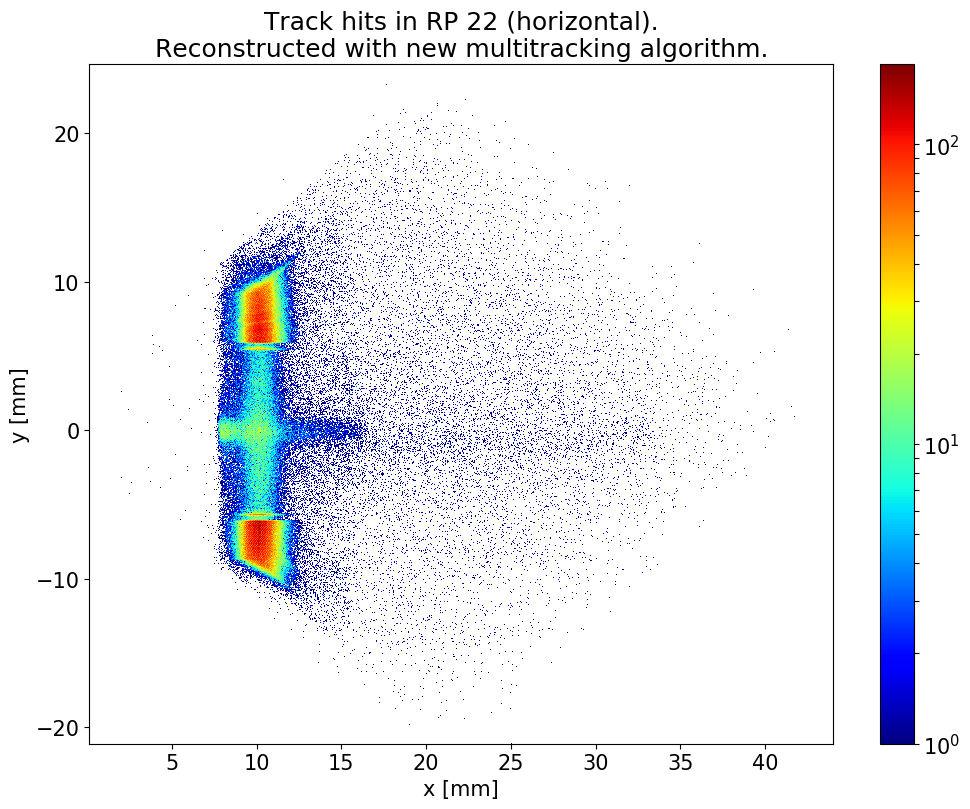

Combining df: DF_NAME_TOTEM_TOP_20
	Append from: 0-49
	22:40:19.008102
	Append from: 50-99
	22:40:25.335327
	Append from: 100-149
	22:40:31.608232
	Append from: 150-199
	22:40:37.642984
	Append from: 200-249
	22:40:44.141608
	Append from: 250-299
	22:40:50.653968
	Append from: 300-349
	22:40:57.058587
	Append from: 350-399
	22:41:02.987758
	Append from: 400-449
	22:41:09.403754
	Append from: 450-499
	22:41:15.730330
	Append from: 500-549
	22:41:23.370336
	Append from: 550-599
	22:41:35.324707
	Append from: 600-649
	22:41:44.144734
	Append from: 650-699
	22:41:59.918044
	Append from: 700-749
	22:42:06.667133
	Append from: 750-799
	22:42:13.603101
	Append from: 800-849
	22:42:25.437116
	Append from: 850-899
	22:42:32.186813
	Append from: 900-949
	22:42:53.237147
	Append from: 950-999
	22:43:00.343074
	Append from: 1000-1049
	22:43:07.714127
	Append from: 1050-1099
	22:43:15.103107
	Append from: 1100-1149
	22:43:22.622069
	Append from: 1150-1199
	22:43:29.637714
	Append from: 1200-1249
	2

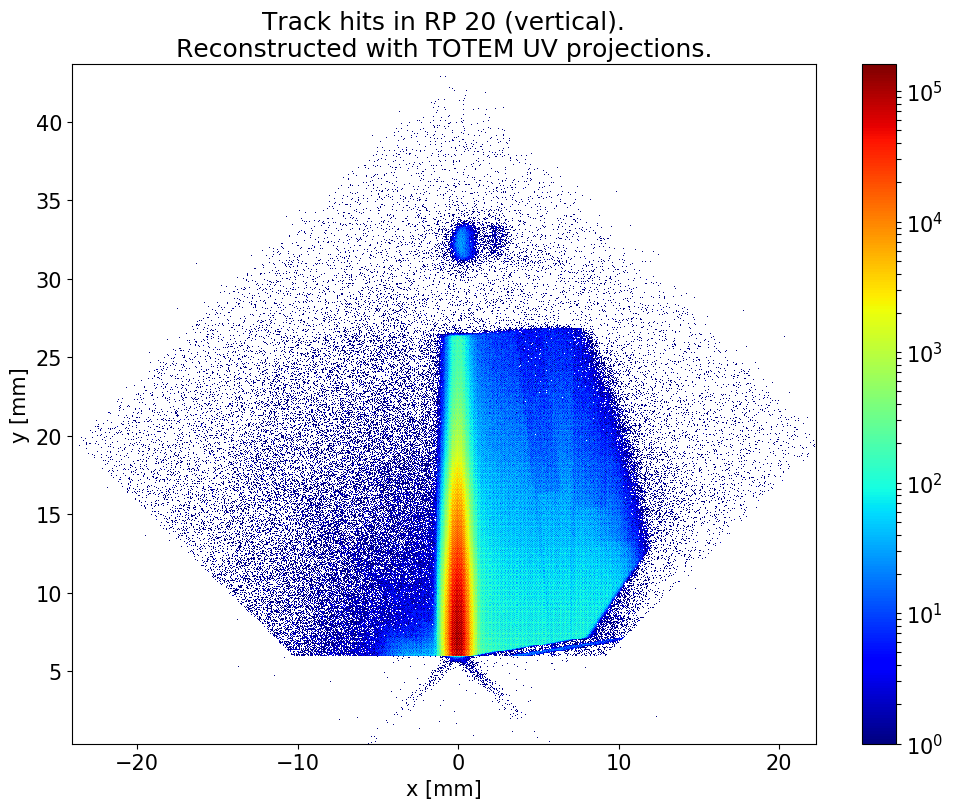

Combining df: DF_NAME_TOTEM_HOR_22
	Append from: 0-49
	22:44:56.864521
	Append from: 50-99
	22:44:56.980675
	Append from: 100-149
	22:44:57.182223
	Append from: 150-199
	22:44:57.281069
	Append from: 200-249
	22:44:57.363687
	Append from: 250-299
	22:44:57.500378
	Append from: 300-349
	22:44:57.642376
	Append from: 350-399
	22:44:57.748604
	Append from: 400-449
	22:44:57.831836
	Append from: 450-499
	22:44:57.924493
	Append from: 500-549
	22:44:58.033140
	Append from: 550-599
	22:44:58.121143
	Append from: 600-649
	22:44:58.206111
	Append from: 650-699
	22:44:58.311805
	Append from: 700-749
	22:44:58.393605
	Append from: 750-799
	22:44:58.471096
	Append from: 800-849
	22:44:58.576328
	Append from: 850-899
	22:44:58.802918
	Append from: 900-949
	22:44:58.892001
	Append from: 950-999
	22:44:59.003002
	Append from: 1000-1049
	22:44:59.096723
	Append from: 1050-1099
	22:44:59.182483
	Append from: 1100-1149
	22:44:59.292811
	Append from: 1150-1199
	22:44:59.395786
	Append from: 1200-1249
	2

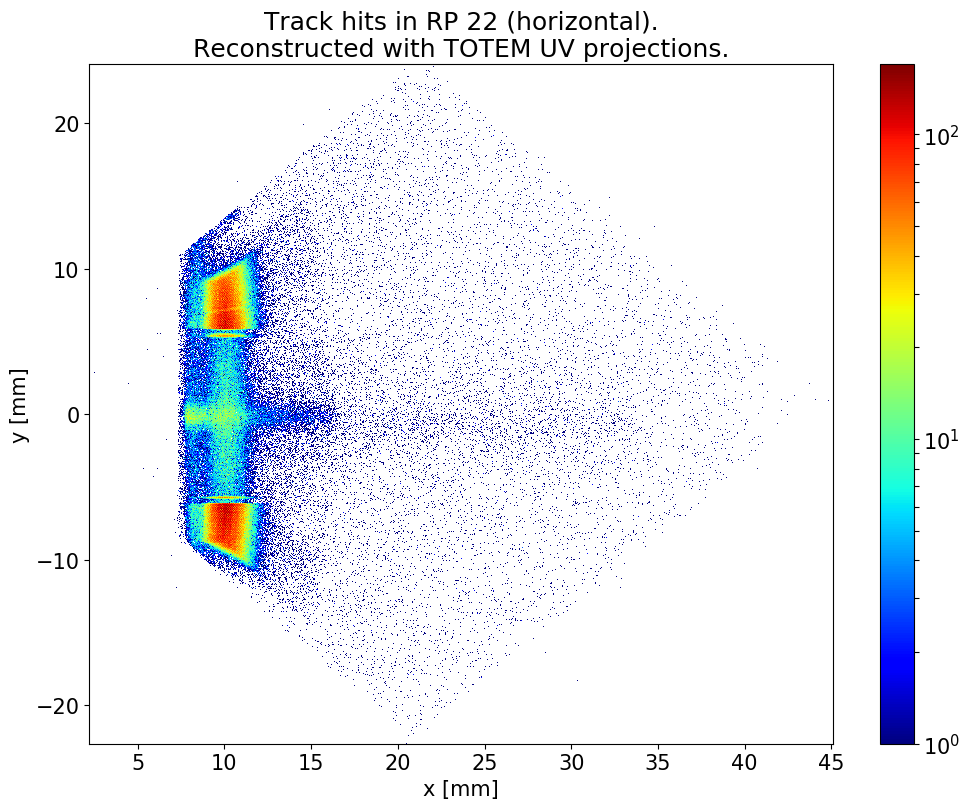

In [17]:
# DF_NAMES_TO_LOAD = [DF_NAME_MY_TOP_20]
plot_all()

In [18]:
# plot_heatmap(my_top_20_df, DF_NAME_MY_TOP_20, x_column='single_x', y_column='single_y')
# plot_heatmap(my_hor_22_df, DF_NAME_MY_HOR_22, x_column='single_x', y_column='single_y')
# plot_heatmap(totem_top_20_df, DF_NAME_TOTEM_TOP_20, x_column='totem_x', y_column='totem_y')
# plot_heatmap(totem_hor_22_df, DF_NAME_TOTEM_HOR_22, x_column='totem_x', y_column='totem_y')

In [19]:
# def plot_by_type(track_type=_11_TYPE):
#     for rpID in RP_IDS:
#         df = RP_ID_TO_DF[rpID]

#         # CUT IT (FILTER OUT DISTANT TRASHES) AND FILTER BY TYPE
#         if track_type is not None:
#             df = filter_by_type(df=df, track_type=track_type)
        
#         df = get_cut_df(df, rpID, cut_out_det_tracks=True, dist_avg_cut=SIGMA * 10, track_type=TYPE_TO_TITLE_TYPE[track_type])
        

#         # TODO FILTER OUT EXTREME CASES
#         figure(figsize=(12, 9), dpi=100)

#         # create data
#         x = np.array(df['x'])
#         y = np.array(df['y'])

#         plot_title = 'Track hits in RP {} ({}).'.format(rpID, rp_group(rpID))
        
#         if track_type is not None:
#             plot_title = plot_title + ' Tracks type: {}'.format(TYPE_TO_TITLE_TYPE[track_type])
#         else:
#             plot_title = plot_title + ' Tracks type: ALL'
        
#         plt.rcParams['font.size'] = 15
        
#         plt.xlabel('x [mm]', fontsize=15)
#         plt.ylabel('y [mm]', fontsize=15)
#         plt.title(plot_title)
#         # bins = (50,50)
#         # x_bins = np.arange(-2.0, 2.0, 0.1)
#         # y_bins = np.arange(-25.0, -4.5, 0.1) 
#         # bins = [x_bins, y_bins]

#         x_bins = RP_ID_TO_BINS[rpID][X_BINS]
#         y_bins = RP_ID_TO_BINS[rpID][Y_BINS]

        
#         plt.hist2d(x, y, bins = (500, 500), cmap=plt.cm.jet, norm=LogNorm())
#         plt.colorbar()
        
#         # Create filename
#         hits_png_filename = hits_png_base + plot_title.replace(' ', '_')
# #         if track_type is not None:
# #             hits_png_filename = hits_png_filename + '_' + track_type
#         hits_png_filename = hits_png_filename + '.png'
        
#         plt.savefig(hits_png_filename)
        
#         plt.show()